In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
import uproot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import rcParams
import os

In [26]:
branches_gen = ['event','genpart_pid','genpart_exphi',
              'genpart_exeta','genpart_gen','genpart_reachedEE',
              'genpart_pt', 'genpart_energy']
branches_tc = ['event', 'tc_subdet', 'tc_zside', 'tc_layer',
            'tc_mipPt', 'tc_energy', 'tc_pt', 'tc_eta', 'tc_phi',
               'tc_waferurot', 'tc_wafervrot',
              'tc_x', 'tc_y', 'tc_z', 'tc_simenergy']
filename = '/data_cms_upgrade/sauvan/HGCAL/Ntuples/occupancy_study/DoublePhoton_FlatPt-1To100_Phase2HLTTDRWinter20DIGI-NoPU_110X_mcRun4_realistic_v3-v1/ntuple.root'
treename = 'hgcalTriggerNtuplizer/HGCalTriggerNtuple'

In [27]:
gen_df = uproot.open(filename)[treename].pandas.df(branches_gen)
tc_df = uproot.open(filename)[treename].pandas.df(branches_tc)

In [28]:
gen_df = gen_df.query('genpart_gen>=0 & genpart_reachedEE==2 & abs(genpart_exeta)>1.6 & abs(genpart_exeta)<2.9 & genpart_pt>20 & genpart_pt<100')
#gen_df = gen_df.query('genpart_gen>=0  & abs(genpart_exeta)>1.6 & abs(genpart_exeta)<2.9')
gen_df['zside'] = np.where(gen_df.genpart_exeta>0, 1, -1)
gen_df = gen_df.reset_index().set_index(['entry', 'zside'])
gen_df

subentry   event  genpart_pid  genpart_exphi  genpart_exeta  \
entry zside                                                                
4      1            1  184079           22       0.810039       1.754615   
6      1            0  184077           22       2.475756       1.978353   
      -1            1  184077           22      -0.665825      -1.972232   
8      1            0  184085           22      -0.872458       2.514664   
      -1            1  184085           22       2.269128      -2.549912   
...               ...     ...          ...            ...            ...   
4659  -1            1  188727           22      -0.113154      -2.722822   
4661  -1            0  188742           22      -0.956907      -2.128352   
4667   1            1  188743           22       1.621536       1.930054   
4668   1            0  188733           22      -0.875340       2.702108   
4669   1            1  188747           22       3.022176       1.836215   

             genpart_gen  genpart_reachedEE  genpart_pt  genpart_energy  
entry zside                                                              
4      1               2                  2   50.712860      154.791931  
6      1               1                  2   46.636906      171.330246  
      -1               2                  2   46.636906      171.330246  
8      1               1                  2   23.064737      145.996597  
      -1               2                  2   23.064737      145.996597  
...                  ...                ...         ...             ...  
4659  -1               2                  2   63.895966      483.307190  
4661  -1               1                  2   49.653736      212.560211  
4667   1               2                  2   89.428711      314.771240  
4668   1               1                  2   89.526367      670.203857  
4669   1               2                  2   66.138939      212.705246  

[874 rows x 9 columns]

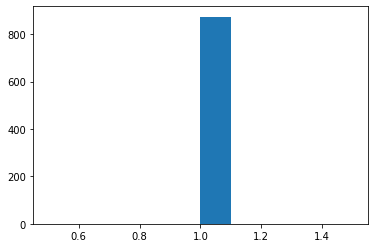

In [29]:
plt.hist(gen_df.groupby(['entry', 'zside']).count().genpart_energy)
plt.show()

In [30]:
tc_df = tc_df[tc_df.tc_simenergy>0]
tc_df.rename(columns={'tc_zside': 'zside'}, inplace=True)
tc_df = tc_df.reset_index().set_index(['entry', 'zside'])
tc_df

subentry   event  tc_subdet  tc_layer  tc_mipPt  tc_energy  \
entry zside                                                               
0     -1           57  184087          1        13  0.127234   0.012942   
      -1           62  184087          1        15  0.442852   0.086198   
      -1           63  184087          1        15  0.055964   0.010775   
      -1           64  184087          1        15  0.751372   0.129297   
      -1           65  184087          1        15  0.756924   0.140072   
...               ...     ...        ...       ...       ...        ...   
4670   1         2902  188737          1         1  5.601850   0.630838   
      -1         2910  188737          1        11  0.317262   0.096926   
      -1         2934  188737          2        30  0.191394   0.116131   
      -1         2941  188737          2        30  0.249629   0.116131   
      -1         2956  188737          2        31  1.079283   0.557431   

                tc_pt    tc_eta    tc_phi  tc_waferurot  tc_wafervrot  \
entry zside                                                             
0     -1     0.003615 -1.948504 -1.731558             7             3   
      -1     0.012582 -2.612172 -2.165683             3             0   
      -1     0.001590 -2.601144 -2.259500             3             0   
      -1     0.021347 -2.487457 -2.101371             3             0   
      -1     0.021505 -2.561078 -2.056808             3             0   
...               ...       ...       ...           ...           ...   
4670   1     0.064709  2.967657  0.816110             2             0   
      -1     0.009009 -3.066667 -1.740636             2             1   
      -1     0.011722 -2.983884 -2.363575             1             3   
      -1     0.015288 -2.716439 -2.233366             1             4   
      -1     0.066099 -2.821804 -0.975651             2             2   

                  tc_x       tc_y        tc_z  tc_simenergy  
entry zside                                                  
0     -1    -15.827202 -97.601746 -339.922760      0.023209  
      -1    -28.352468 -41.900818 -342.892792      0.094002  
      -1    -32.513489 -39.498451 -342.892792      0.015688  
      -1    -29.045973 -49.508308 -342.892792      0.128916  
      -1    -24.884953 -47.105949 -342.892792      0.145690  
...                ...        ...         ...           ...  
4670   1     22.754442  24.196865  322.102753      0.604099  
      -1     -5.316859 -31.003571 -336.952759      0.108067  
      -1    -26.965462 -26.570366 -373.149048      0.145086  
      -1    -30.482979 -39.069191 -373.149048      0.157065  
      -1     25.347286 -37.438747 -378.598999      0.587757  

[1718120 rows x 15 columns]

In [9]:
def cluster(row):
    ntc = row.shape[0]
    sumpt = np.sum(row.tc_pt)
    return pd.Series((ntc,sumpt))

In [20]:
version = 'TT_TuneCP5_14TeV-powheg-pythia8_Phase2HLTTDRWinter20DIGI-PU200_110X_mcRun4_realistic_v3-v2_201130'
df_thresholds = pd.read_csv('../scripts/results/elinks_interpolated_overheadwords_{}.csv'.format(version))
df_thresholds

,layer,waferu,waferv,elinks,threshold
0,1,1,2,1,5.36
1,1,1,2,2,3.34
2,1,1,2,3,2.73
3,1,1,2,4,2.38
4,1,1,2,5,1.99
...,...,...,...,...,...
42818,50,7,6,9,0.29
42819,50,7,6,10,0.24
42820,50,7,6,11,0.21
42821,50,7,6,12,0.17


In [41]:
df_events = tc_df.rename(columns={"tc_waferurot":"waferu", "tc_wafervrot":"waferv", "tc_layer":"layer"}).reset_index().set_index(['layer', 'waferu', 'waferv'])
df_test = df_events.join(df_thresholds[df_thresholds.elinks==2].set_index(['layer', 'waferu', 'waferv']))

In [42]:
print(df_test.shape)
print(df_events.shape)
df_test

(1718120, 16)
(1718120, 14)


entry  zside  subentry   event  tc_subdet  tc_mipPt  \
layer waferu waferv                                                        
1     1      2          30      1      2556  184098          1  6.657715   
             2          30      1      2557  184098          1  0.471342   
             2          30      1      2558  184098          1  0.121577   
             2          30      1      2559  184098          1  0.113237   
             2          35     -1      2376  184099          1  0.111855   
...                    ...    ...       ...     ...        ...       ...   
50    5      2        2489      1       280  186559          2  0.092118   
             3        2489      1      2942  186559          2  0.061493   
             3        2489      1      2943  186559          2  0.147412   
             5        2489      1       110  186559          2  0.160055   
      6      5        2489      1        70  186559          2  3.283108   

                     tc_energy     tc_pt    tc_eta    tc_phi       tc_x  \
layer waferu waferv                                                       
1     1      2        0.700932  0.076906  2.899955 -0.614747  29.045973   
             2        0.048189  0.005445  2.870440 -0.555161  31.126482   
             2        0.013142  0.001404  2.926535 -0.677798  26.965462   
             2        0.013142  0.001308  2.997983 -0.494894  28.352468   
             2        0.013142  0.001292 -3.010323 -2.845146 -30.432980   
...                        ...       ...       ...       ...        ...   
50    5      2        0.078495  0.009533  2.797705  0.813664  43.123829   
             3        0.047097  0.006364  2.690133  0.600478  57.737400   
             3        0.125592  0.015255  2.797548  0.609293  51.495869   
             5        0.125592  0.016564  2.714592  0.031217  68.239944   
      6      5        1.883875  0.339761  2.397759  0.249560  91.175560   

                          tc_y        tc_z  tc_simenergy  elinks  threshold  
layer waferu waferv                                                          
1     1      2      -20.506714  322.102753      0.677645     2.0       3.34  
             2      -19.305534  322.102753      0.051952     2.0       3.34  
             2      -21.707899  322.102753      0.013204     2.0       3.34  
             2      -15.301588  322.102753      0.014935     2.0       3.34  
             2       -9.295673 -322.102753      0.013336     2.0       3.34  
...                        ...         ...           ...     ...        ...  
50    5      2       45.633339  513.148987      0.083373     2.0       0.48  
             3       39.540817  513.148987      0.063329     2.0       0.48  
             3       35.937267  513.148987      0.144546     2.0       0.48  
             5        2.130938  513.148987      0.141415     2.0       0.48  
      6      5       23.238243  513.148987      2.145364     2.0       0.48  

[1718120 rows x 16 columns]

In [64]:
def links_signaldriven(row, elinks1, elinks2):
    links = elinks1
    if row.layer>=7 and row.layer<=13:
        links = elinks2
    return links

In [65]:
def simulate(elinks1, elinks2):
    df_events = tc_df.rename(columns={"tc_waferurot":"waferu", "tc_wafervrot":"waferv", "tc_layer":"layer"}).reset_index().set_index(['layer', 'waferu', 'waferv'])
    df_thresholds['elinks_choice'] = df_thresholds.apply(lambda x:links_signaldriven(x, elinks1, elinks2))
    df_events = df_events.join(df_thresholds[df_thresholds.elinks==df_thresholds.elinks_choice].set_index(['layer', 'waferu', 'waferv']))
    df_events['pass'] = (df_events.tc_mipPt>df_events.threshold)
    clusters = df_events[df_events['pass']].groupby(['entry', 'zside']).apply(cluster)
    clusters.columns = ['ntc', 'sumpt']
    clusters_df = gen_df.join(clusters, how='left')
    clusters_df['pt_ratio'] = clusters_df.sumpt / clusters_df.genpart_pt
    resolution = np.std(clusters_df.pt_ratio)
    mean = np.mean(clusters_df.pt_ratio)
    return resolution/mean

In [47]:
import itertools
elinks1 = [2,3,4,5]
elinks2 = [2,4,6,8,10]
resolutions = []
for e1,e2 in itertools.product(elinks1,elinks2):
    print(e1,e2)
    resolutions.append(simulate(elink))

2
3
4
5
6
7
8
9
10
11
12
13


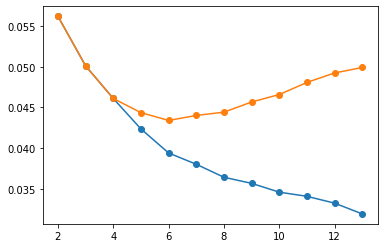

In [73]:
plt.plot(elinks, resolutions, 'o-')
#plt.plot(elinks, 0.005*np.log(np.array(elinks)-1), 'o-')
plt.plot(elinks, resolutions + np.maximum(0, 0.002*(np.array(elinks)-4)), 'o-')
plt.show()